# Рынок заведений общественного питания Москвы

## Описание проекта

Необходимо подготовить анализ рынка конкурентов среди заведений общественного питания Москвы.

## Оглавление
- [Шаг 1. Загрузить данные и подготовить их к анализу](#step1)
- [Шаг 2. Анализ данных.](#step2)
- [Шаг 3. Подготовка презентации.](#step3)

## Описание данных
Таблица *rest_data*:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

### Шаг 1. Загрузить данные и подготовить их к анализу <a id=step1></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import requests
import json

In [2]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

In [3]:
data = pd.read_csv('rest_data.csv')
display(data.head())
display(data.info())
display(data['chain'].value_counts())
display(data['number'].value_counts())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

нет    12398
да      2968
Name: chain, dtype: int64

0      1621
40      835
20      727
30      685
10      644
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

In [4]:
# Попробуем отыскать дубликаты. Для этого создадим новый датафрейм, 
# который будет состоять из тех же столбцов, что и rest_data, кроме 'id'.

rest_data = data[['object_name', 'chain', 'object_type', 'address', 'number']]
rest_data.duplicated().sum()

82

In [5]:
# Нашлось 82 дубликата, которые стоит удалить.

rest_data = rest_data.drop_duplicates()
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15284 non-null  object
 1   chain        15284 non-null  object
 2   object_type  15284 non-null  object
 3   address      15284 non-null  object
 4   number       15284 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 716.4+ KB


In [6]:
# Посмотрим, что за места с 0 колчиеством мест.
rest_data[rest_data['number']==0]

,object_name,chain,object_type,address,number
137,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
...,...,...,...,...,...
15334,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,МИЛТИ,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,Готовые блюда Милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,Милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


Видим, что это просто закусочные, которые расположены либо в отдельных палаточках, либо на островках в ТЦ, где посетители покупают еду и уносят с собой, сидеть атм негде.

In [7]:
display(rest_data['object_type'].value_counts())

кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1898
бар                                   855
буфет                                 577
кафетерий                             395
закусочная                            349
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [8]:
# Приведем названия кафе и адреса к нижнему регистру, 
# это упростит дальнейшую работу.

rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()
rest_data.head(10)

,object_name,chain,object_type,address,number
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


##### Выводы о данных:
- у нас есть данные о 15366 заведениях общественногоп итания Москвы;
- среди них нет пропусков, но было 82 дубликата, которые мы удалили;
- все столбцы приведены в тот тип данных, которых необходим для дальнейшей работы;
- видим, что одно и то же заведение (если оно сетевое и имеет несколько точек в Москве) может принаджелажть к разным типам объектов общественного питания;
- самое большое количество заведение - заведения с 0 количеством посадочных мест - 1621.

### Шаг 2. Анализ данных <a id=step2></a>

- Исследование соотношения видов объектов общественного питания по количеству. График.

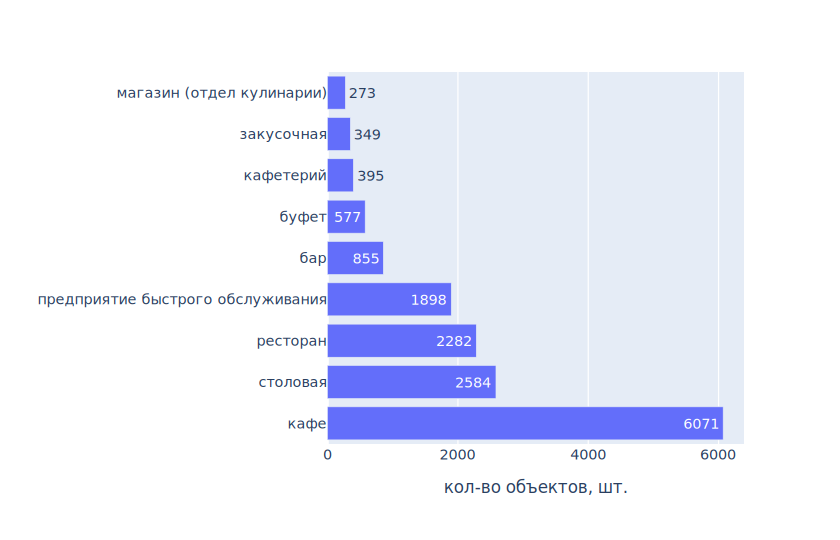

In [9]:
rest_by_types_no_chain = (rest_data.groupby('object_type').
                 agg({'object_name':'count'}).reset_index().
                 sort_values(by='object_name', ascending=False))
fig0 = px.bar(rest_by_types_no_chain, x='object_name', y='object_type', 
              text='object_name', orientation='h')
fig0.update_yaxes(title_text=' ')
fig0.update_xaxes(title_text='кол-во объектов, шт.')
fig0.show()

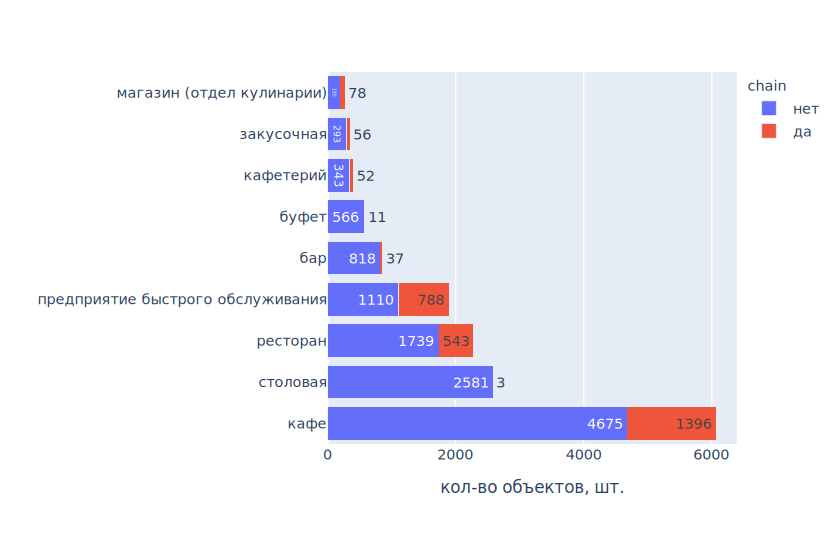

In [10]:
# Теперь посмотрим в разбивке по сетевым и несетевым.

rest_by_types = (rest_data.groupby(['object_type', 'chain']).
                 agg({'object_name':'count'}).reset_index().
                 sort_values(by='object_name', ascending=False))
rest_by_types.columns = ['object_type','chain', 'number']

fig = px.bar(rest_by_types, x='number', y='object_type', text='number', color='chain',
             barmode='stack', orientation='h')
fig.update_yaxes(title_text=' ')
fig.update_xaxes(title_text='кол-во объектов, шт.')

Самая большая группа из всех общественных заведений, которая ушла вперед по колчиеству с большим отрывом - кафе, после них идут столовая, ресторан и предприятия быстрого обслуживания.

Здесь же сразу видно, что в Москве из всех объектов общественного, как сетевых, так и несетевых, преобладает кафе.

- Исследование соотношения сетевых и несетевых заведений по количеству.График.

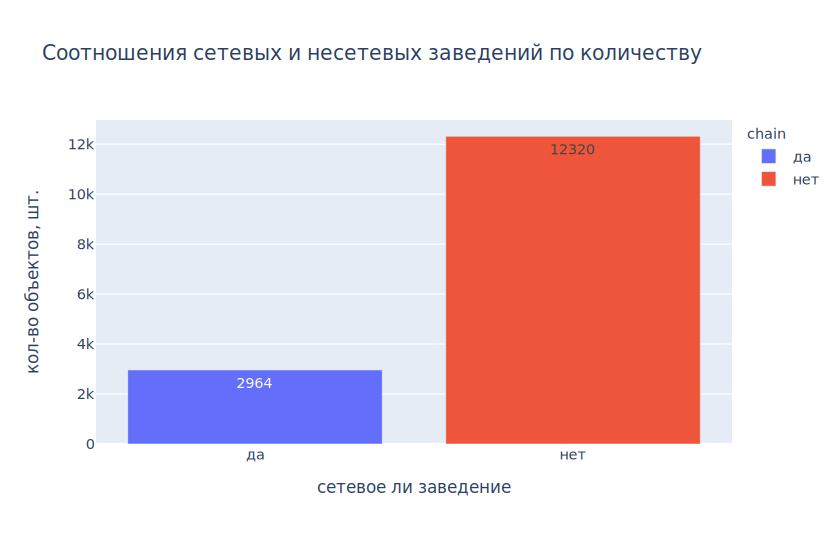

In [11]:
chain_rest = rest_data.groupby('chain')['object_name'].count().reset_index()
chain_rest.columns = ['chain', 'number']
fig1 = px.bar(chain_rest, x='chain', y='number', text='number', color='chain',
             title="Соотношения сетевых и несетевых заведений по количеству")
fig1.update_xaxes(title_text='сетевое ли заведение')
fig1.update_yaxes(title_text='кол-во объектов, шт.')

Несетевых мест общественного питания гораздо больше, чем сетевых. Это говорит о том, что в Москве такой бизнес хорошо приживается, сильно развит частный бизнес, где в каждом таком месте собственник стремится сделать нечто индивидуальное.

- Для какого вида объекта общественного питания характерно сетевое распространение.

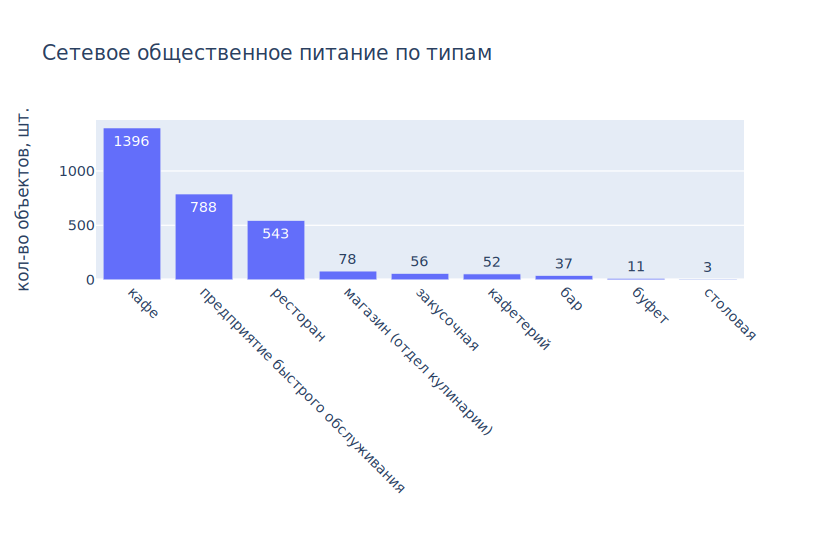

In [12]:
chain_rest = rest_data.loc[rest_data['chain'] == 'да']
chain_rest_grouped_by_type = chain_rest.groupby('object_type').agg(
    {'object_name':'count'}).reset_index().sort_values(by='object_name', ascending=False)
chain_rest_grouped_by_type.columns = ['object_type', 'number']
fig = px.bar(chain_rest_grouped_by_type, x='object_type', y='number', 
             title="Сетевое общественное питание по типам", text='number')
fig.update_xaxes(tickangle=45, title_text=' ')
fig.update_yaxes(title_text='кол-во объектов, шт.')

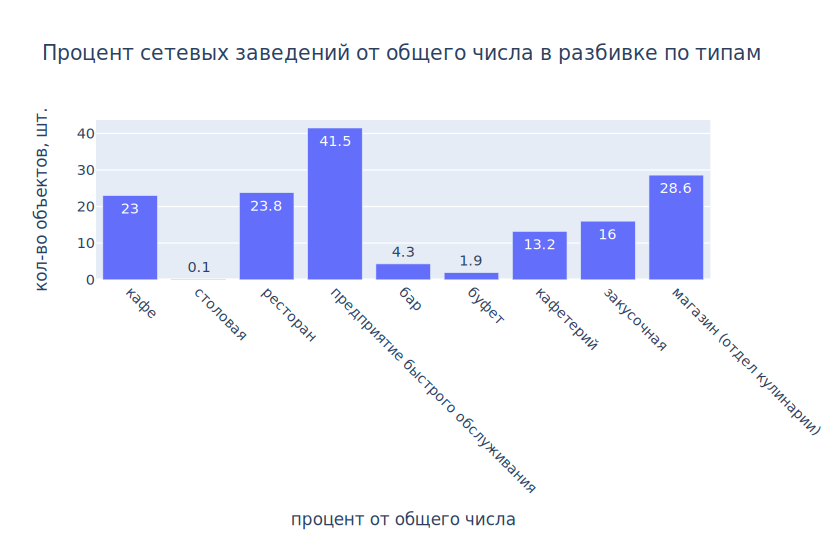

In [13]:
chain_to_total = rest_by_types_no_chain.merge(chain_rest_grouped_by_type, left_on='object_type', right_on='object_type')
chain_to_total['%_chain'] = (chain_to_total['number']/chain_to_total['object_name']*100).round(1)
fig = px.bar(chain_to_total, x='object_type', y='%_chain', 
             title="Процент сетевых заведений от общего числа в разбивке по типам", text='%_chain')
fig.update_xaxes(tickangle=45, title_text='процент от общего числа')
fig.update_yaxes(title_text='кол-во объектов, шт.')

Самый высокий процент сетевых заведений от общего числа принадлежит предприятиям быстрого обслуживания - они же фаст-фут(41.1%). И это совсем неудивительно, так как на каждом шагу мы встречаем такие заведения, как Макдональдс, Бургер Кинг или КФС. Далее по убыванию идут магазины с отделами кулинарии, рестораны и только после этого идут кафею

- Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [14]:
chain_rest_grouped_be_seats = (chain_rest.groupby('number').
                               agg({'object_type':'count'}).
                               reset_index())
chain_rest_grouped_be_seats.columns = ['number_of_seats', 'count']
chain_rest_grouped_be_seats.sort_values(by='count', ascending=False).head(20)

,number_of_seats,count
0,0,265
20,20,161
40,40,144
10,10,131
50,50,122
30,30,121
59,60,96
15,15,78
45,45,74
25,25,69


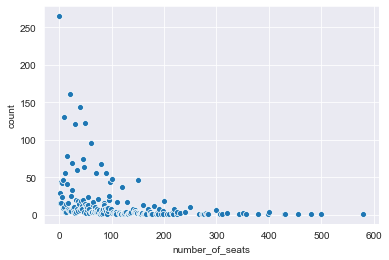

In [15]:
sns.set_style("darkgrid") 
sns.scatterplot(data=chain_rest_grouped_be_seats, x='number_of_seats', y='count')


Чаще встречаются заведения на небольшое количество людей - от 0 до 150 примерно, заведений с количеством посадочных мест от 200 намного меньше. Не каждый может себе позвонить снимать или приобретать такие большие по площади помещения.

- Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест. График.

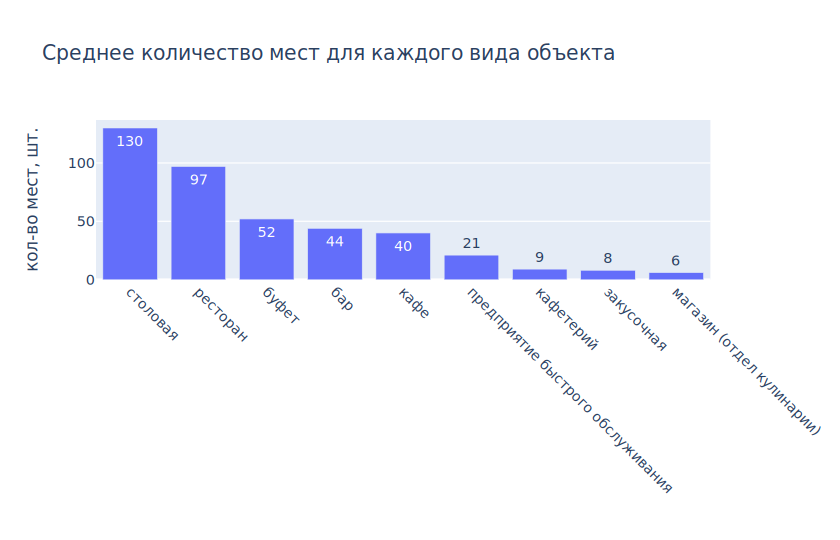

In [16]:
rest_grouped_by_types = rest_data.groupby('object_type').agg(
    {'number':'mean'}).round().reset_index().sort_values(by='number', ascending=False)
rest_grouped_by_types.columns = ['object_type', 'mean_number']
fig2 = px.bar(rest_grouped_by_types, x='object_type', y='mean_number',
              text='mean_number',
              title='Среднее количество мест для каждого вида объекта')
fig2.update_xaxes(tickangle=45, title_text=' ')
fig2.update_yaxes(title_text='кол-во мест, шт.')
fig2.show()

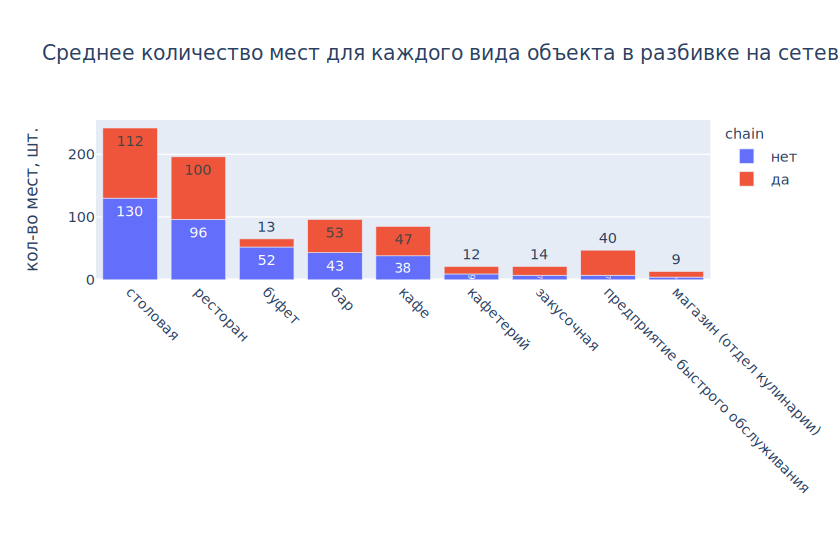

In [17]:
# Посчитаем среднее количество мест для каждого типа заведения в разбивке на сетевые и несетевые.
rest_grouped_by_types_chains = rest_data.groupby(['object_type', 'chain']).agg(
    {'number':'mean'}).round().reset_index().sort_values(by='number', ascending=False)
rest_grouped_by_types_chains.columns = ['object_type','chain', 'mean_number']
fig5 = px.bar(rest_grouped_by_types_chains, x='object_type', y='mean_number',
              text='mean_number', color='chain',
              title='Среднее количество мест для каждого вида объекта в разбивке на сетевые и несетевые объекты')
fig5.update_xaxes(tickangle=45, title_text=' ')
fig5.update_yaxes(title_text='кол-во мест, шт.')
fig5.show()

Вполне ожидаемо видим, что в среднем самое большое количество посадочных мест принадлежит столовым, , далее идут рестораны, дальше в среднем почти в два раза меньше мест предоставляют буфеты и бары.

- Выделяем в отельный столбец информацию об улице из столбца 'address'.

In [18]:
rest_data.head()

,object_name,chain,object_type,address,number
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [19]:
street_words = ['улица', 'шоссе', 'проспект', 
                'проезд', 'переулок', 'бульвар', 
                'площадь', 'порсека', 'набережная', 
                'проспект', 'сквер', 'аллея', 'вал']

def take_street(address):
    for position in [1, 0, 2]:
        for address_part in address.split(',')[position].split(' '):
            if address_part in street_words:
                street = address.split(', ')[position]
                return street
                
rest_data['street'] = rest_data['address'].apply(take_street)
rest_data.head()

,object_name,chain,object_type,address,number,street
0,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


- Построим график топ-10 улиц по количеству объектов общественного питания. Узнаем, в каких районах Москвы находятся эти улицы.

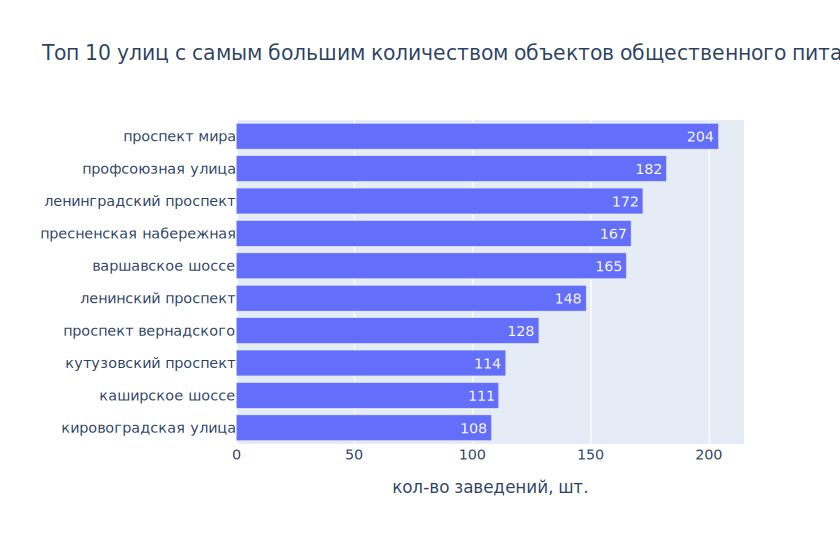

In [20]:
grouped_by_street = (rest_data.groupby('street').
                     agg({'object_name':'count'}).
                     reset_index().
                     sort_values(by='object_name', ascending=False))
grouped_by_street.columns = ['street', 'rest_number']

grouped_by_street_top_10 = grouped_by_street.head(10).sort_values(by='rest_number', ascending=True)
fig3 = px.bar(grouped_by_street_top_10, 
              x='rest_number', y='street', text='rest_number',orientation='h',
              title='Топ 10 улиц с самым большим количеством объектов общественного питания')
fig3.update_xaxes(title_text='кол-во заведений, шт.')
fig3.update_yaxes(title_text=' ')
fig3.show()

Проспект мира является улицей, на которой больше всего заведений общественного питания. Можем предположить. Не могу предположить, по какой именно причине она стала таковой, так как она не самая протяженная из представленных и не ближе всех находится в центре. Возможно, она более живописная или же аренда в этих краях ниже, чем на других улицах.

Создадим датафрейм, в котором будут полные данные (включая адрес) только тех заведений, которые находятся на улицах из списка grouped_by_street_top_10.

In [21]:
streets_list = list(grouped_by_street_top_10['street'])
rest_data_top10 = rest_data[rest_data['street'].isin(streets_list)]

rest_data_top10

,object_name,chain,object_type,address,number,street
151,кафе «андерсон»,да,кафе,"город москва, варшавское шоссе, дом 2",150,варшавское шоссе
152,кафе «subway»,да,кафе,"город москва, варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе
153,кафе «ламаджо»,нет,кафе,"город москва, варшавское шоссе, дом 29",30,варшавское шоссе
154,шаурма в пите,нет,предприятие быстрого обслуживания,"город москва, варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе
155,выпечка,нет,кафетерий,"город москва, варшавское шоссе, дом 100",2,варшавское шоссе
...,...,...,...,...,...,...
15308,додо пицца,да,кафе,"город москва, пресненская набережная, дом 12",25,пресненская набережная
15325,милти,да,предприятие быстрого обслуживания,"город москва, ленинградский проспект, дом 80, ...",0,ленинградский проспект
15347,кальянная «мята lounge»,да,кафе,"город москва, профсоюзная улица, дом 142, корп...",40,профсоюзная улица
15350,мята,да,кафетерий,"город москва, каширское шоссе, дом 96, корпус 1",35,каширское шоссе


Сначала через API найдем координаты каждого из заведений на этих топ-10 улицах, только после этого также через API сможем достать район, в котором находится заведение.

Мы закомментировали код, с помощью которого через API доставались координаты и информация о районе, так как геокодер больше недоступен для воспроизведения текущего кода. Получившаяся таблица сохранена в отдельном файле rest_data_top10_new.csv, который как был получен путем парсинга данных, где уже будет храниться информация об улицах, координатах и районах.

In [22]:
# Посмотрим на распределение заведений общественного питания по районам.
rest_data_top10 = pd.read_csv('Desktop/Everything/Учеба/Аналитика/Яндекс.Практикум/rest_data_top10_new.csv', sep=';')
rest_by_district = (rest_data_top10.groupby('district').
                    agg({'address':'count'}).
                    reset_index().
                    sort_values(by='address', ascending=False))
rest_by_district

,district,address
9,Пресненский район,167
29,район Чертаново Центральное,90
25,район Тропарёво-Никулино,84
12,район Аэропорт,64
7,Обручевский район,64
5,Мещанский район,63
23,район Свиблово,62
14,район Дорогомилово,61
17,район Нагатино-Садовники,56
27,район Фили-Давыдково,53


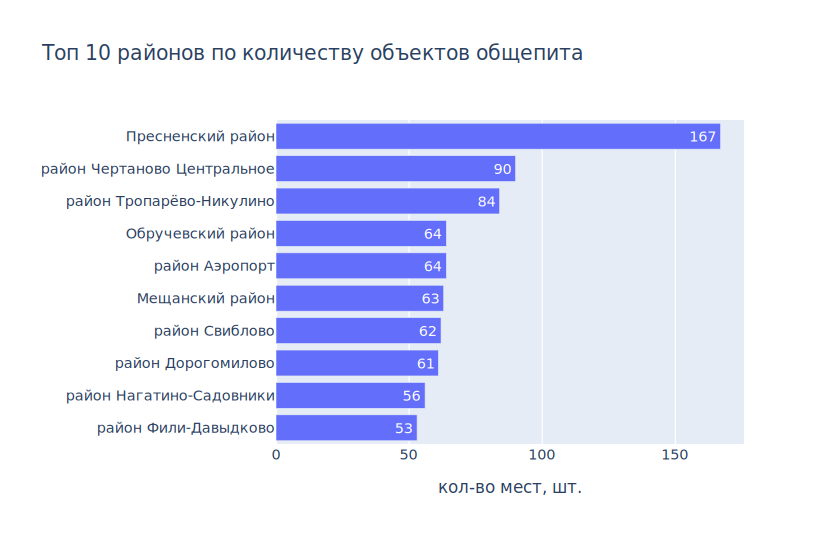

In [23]:
fig7 = px.bar(rest_by_district.head(10).sort_values(by='address'), 
              x='address', y='district',
              text='address', orientation='h',
              title='Топ 10 районов по количеству объектов общепита')
fig7.update_xaxes(title_text='кол-во мест, шт.')
fig7.update_yaxes(title_text='')
fig7.show()

Наибольше количество объектов общественного питания находится в Пресненском районе. Это центральный административный округ, где рядом набережная и Москва-сити, что сильно привлекает туристов.

In [24]:
# Также интересно узнать сколько улиц из списка топ 10 приходится на каждый район.

district_top10 = rest_data_top10.groupby('district').agg({'street':'nunique'})
display(district_top10.sort_values(by='street', ascending=False).shape)
display(district_top10.sort_values(by='street', ascending=False).head(15))

(35, 1)

,street
district,
район Нагатино-Садовники,2
Обручевский район,2
район Тропарёво-Никулино,2
район Тёплый Стан,2
район Чертаново Северное,2
район Чертаново Центральное,2
район Проспект Вернадского,2
район Чертаново Южное,2
Ломоносовский район,2


In [25]:
# И еще посмотрим, через сколько районов проходит каждая улица из списка топ 10.

streets_by_districts = rest_data_top10.groupby('street').agg({'district':'nunique'})
display(streets_by_districts.sort_values(by='district', ascending=False).shape)
display(streets_by_districts.sort_values(by='district', ascending=False).head(15))

(10, 1)

,district
street,
ленинский проспект,8
варшавское шоссе,7
проспект мира,6
профсоюзная улица,6
проспект вернадского,5
каширское шоссе,4
ленинградский проспект,4
кировоградская улица,3
кутузовский проспект,2


- Из 35 получившихся районов в 11 находятся по 2 улицы из топ 10.
- При этом мы видим, что на одну улицу может приходиться до 8 районов.

- Найдем число улиц с одним объектом общественного питания. Узнаем, в каких районах Москвы находятся эти улицы.

Аналогичным способом я сделаю сдесь, сохранив получившийся результат в файл, ячейку с кодом отмечу как Markdown, чтобы можно было проверить код, а после выведу через новую переменную созраненный датасет.

In [26]:
grouped_by_streets = (rest_data.groupby('street').
                      agg({'object_name':'count'}).reset_index().
                      sort_values(by='object_name'))
grouped_by_streets.columns = ['street', 'rest_number']
streets_with_one_rest = grouped_by_streets.loc[grouped_by_streets['rest_number'] == 1]

street_list_one_rest = list(streets_with_one_rest['street'])
single_rests = rest_data[rest_data['street'].isin(street_list_one_rest)]
    
single_rests.head()

,object_name,chain,object_type,address,number,street
19,американская лаборатория десертов,нет,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок
61,столовая,нет,столовая,"город москва, бабаевская улица, дом 3",90,бабаевская улица
69,хуанхэ,нет,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,1-й балтийский переулок
81,азербайджан,нет,ресторан,"город москва, улица демьяна бедного, дом 4",180,улица демьяна бедного
131,вгик,нет,столовая,"город москва, будайская улица, дом 3",45,будайская улица


In [27]:
streets_with_one_rest

,street,rest_number
1862,яхромская улица,1
1333,улица атарбекова,1
1331,улица артюхиной,1
539,зарайская улица,1
543,звонарский переулок,1
...,...,...
137,2-я улица марьиной рощи,1
168,3-я песчаная улица,1
111,2-й стрелецкий проезд,1
1753,успенский переулок,1


In [28]:
# При помощи той же функции найдем координаты и районы тех заведений, которые являются единственными на своей улице.
# single_rests['coords'] = single_rests['address'].apply(get_coord)
# single_rests['district'] = single_rests['coords'].apply(get_district)

single_rests = pd.read_csv('Desktop/Everything/Учеба/Аналитика/Яндекс.Практикум/single_rests_new.csv', sep=';')
single_rests.head()

,Unnamed: 0,object_name,chain,object_type,address,number,street,coords,district
0,19,американская лаборатория десертов,нет,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок,37.598573 55.75058,район Арбат
1,61,столовая,нет,столовая,"город москва, бабаевская улица, дом 3",90,бабаевская улица,37.689069 55.790595,район Сокольники
2,69,хуанхэ,нет,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,1-й балтийский переулок,37.518785 55.810471,район Аэропорт
3,81,азербайджан,нет,ресторан,"город москва, улица демьяна бедного, дом 4",180,улица демьяна бедного,37.48693 55.770401,район Хорошёво-Мнёвники
4,131,вгик,нет,столовая,"город москва, будайская улица, дом 3",45,будайская улица,37.665156 55.831903,район Ростокино


In [29]:
# Посмотрим на список районом, куда входят улицы только с 1 объектом общепита.

display(single_rests.head())
display(single_rests.groupby('district').agg({'object_name':'count'}).
        sort_values(by='object_name', ascending=False).head(10))

,Unnamed: 0,object_name,chain,object_type,address,number,street,coords,district
0,19,американская лаборатория десертов,нет,кафе,"город москва, филипповский переулок, дом 15/5",20,филипповский переулок,37.598573 55.75058,район Арбат
1,61,столовая,нет,столовая,"город москва, бабаевская улица, дом 3",90,бабаевская улица,37.689069 55.790595,район Сокольники
2,69,хуанхэ,нет,ресторан,"город москва, 1-й балтийский переулок, дом 3/25",60,1-й балтийский переулок,37.518785 55.810471,район Аэропорт
3,81,азербайджан,нет,ресторан,"город москва, улица демьяна бедного, дом 4",180,улица демьяна бедного,37.48693 55.770401,район Хорошёво-Мнёвники
4,131,вгик,нет,столовая,"город москва, будайская улица, дом 3",45,будайская улица,37.665156 55.831903,район Ростокино


,object_name
district,
район Хамовники,26
Таганский район,26
Басманный район,21
Тверской район,20
Пресненский район,19
район Марьина Роща,17
Мещанский район,12
район Лефортово,12
район Замоскворечье,12


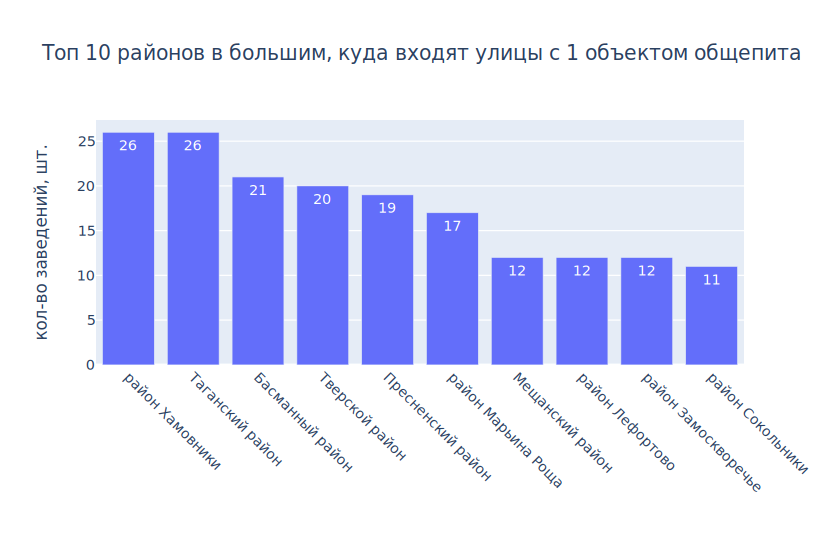

In [30]:
fig4 = px.bar(single_rests.groupby('district').agg({'object_name':'count'}).
        sort_values(by='object_name', ascending=False).head(10).reset_index(), 
              x='district', y='object_name', text='object_name',
              title='Топ 10 районов в большим, куда входят улицы с 1 объектом общепита')
fig4.update_xaxes(tickangle=45, title_text=' ')
fig4.update_yaxes(title_text='кол-во заведений, шт.')
fig4.show()

Подучилось 527 улиц, на которых всего одно заведение. Очень заметно, что чем ближе мы к центру Москвы, тем больше одиночных заведений там находится.

- Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.  Выявим закономерности.

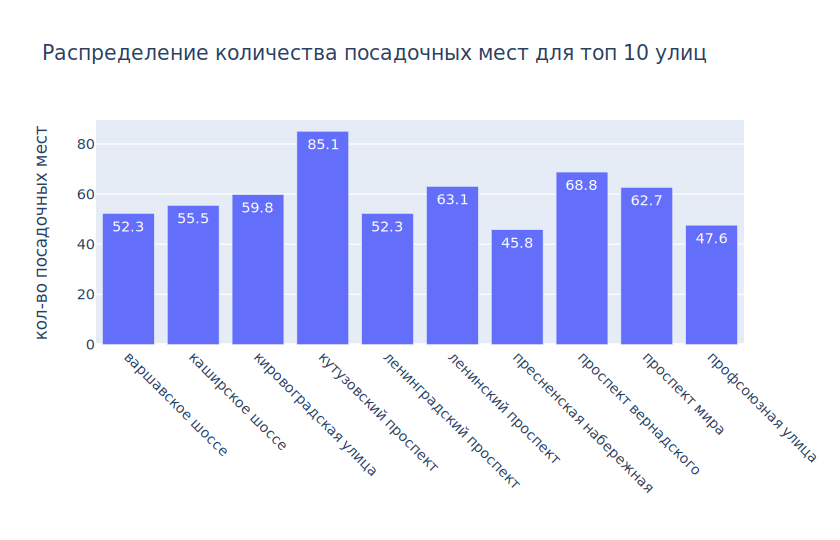

In [31]:
rest_data_top10.groupby('street').agg({'number':'mean'}).round(1)

fig4 = px.bar(rest_data_top10.groupby('street').agg({'number':'mean'}).reset_index().round(1), 
              x='street', y='number', text='number',
              title='Распределение количества посадочных мест для топ 10 улиц')
fig4.update_xaxes(tickangle=45, title_text=" ")
fig4.update_yaxes(title_text='кол-во посадочных мест')
fig4.show()

Text(0.5, 1.0, 'Распределение количества посадочных мест для топ 10 улиц')

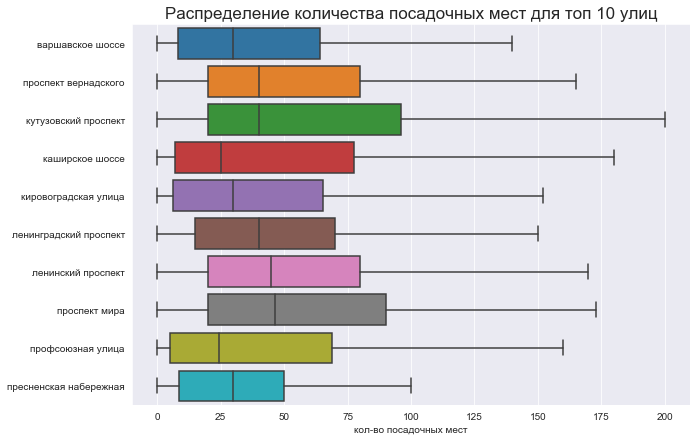

In [32]:
plt.subplots(figsize=(10, 7))
sns.boxplot(data=rest_data_top10, x='number', y='street', showfliers=False)
plt.xlabel('кол-во посадочных мест')
plt.ylabel('')
plt.title('Распределение количества посадочных мест для топ 10 улиц', size=17)

В разбивке по улицам мы видим, что среднее количество посадочных мест больше для улицы Кутузовский проспект, а заведения с меньшим средним количеством мест характерно для пресненской набережной. Интересное наблюдение с учетом того, что это две параллельные улицы, которые находятся по разные стороны от Москвы-реки.

#### Выводы и рекомендации
##### Выводы:
Наиболее распространенный тип заведения общественного питания это:
- кафе, столовая, ресторан, предприятие быстрого обслуживания;
- вместимость: 30-50 человек;
- несетевое (80% против 20%);
- расположение: центр, юг, юго-запад и северо-восток Москвы.

##### Рекомендации:
- тип - кафе или ресторан - эти заведения хорошо приживаются в Москве;
- несетевой формат работы заведения;
- посадочные места - до 40 человек;
- расположение: центр Москвы в пределах ТТК.

### Шаг 3. Подготовка презентации <a id=step3></a>

Презентация: https://yadi.sk/i/IAEEg4YAJgN-vg